In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

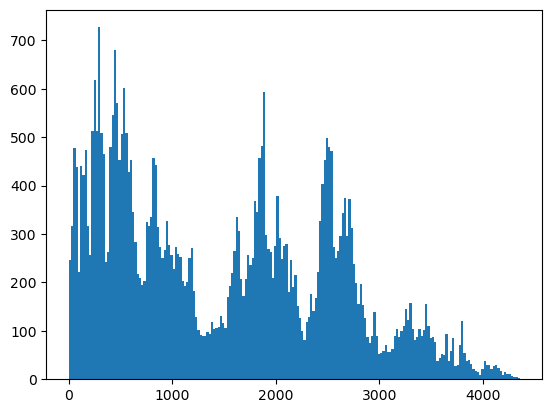

In [2]:
import math
import numpy as np
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy.stats import poisson
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tools.numdiff import approx_hess1, approx_hess2, approx_hess3
import pandas as pd

df = pd.read_csv('D:/data/Zircons/Roberts_Spencer_2015.csv')
ages = df["U-Pb (Ma)"]
data = plt.hist(ages, bins = 200)

In [3]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.1.2


In [4]:
zircons_data = data[0]
ages = data[1][1:]
print(len(ages))
print(max(ages))

200
4358.0


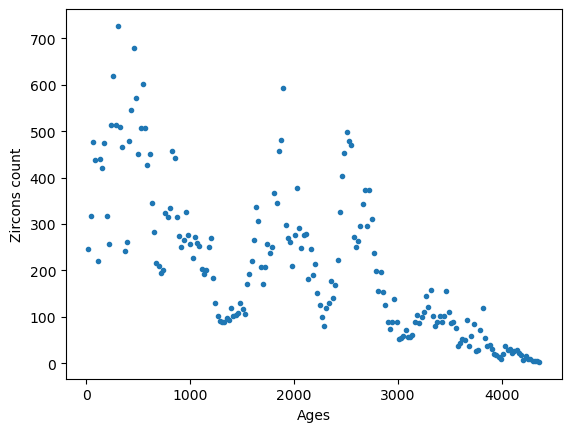

In [5]:
plt.plot(ages, zircons_data, "o", markersize=3, alpha=1)
plt.ylabel("Zircons count")
plt.xlabel("Ages");

In [6]:
ages_nominal = np.arange(len(ages))
print(max(ages))

4358.0


In [17]:
pm.sample??

In [24]:
tr =pm.distributions.transforms

Order = tr.Ordered()

Logodd = tr.LogOddsTransform()

chain_tran = tr.Chain([Logodd, Order])

n = 2

with pm.Model() as model:
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = 1 , shape = n, transform = chain_tran,  initval=np.linspace(0.1,0.9,n))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    traceTest1 = pm.sample(draws= 10000, tune = 10000, init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [switchpoints]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 40 seconds.
There were 119 divergences after tuning. Increase `target_accept` or reparameterize.


In [25]:
pm.summary(traceTest1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
switchpoints[0],0.252,0.221,0.000,0.676,0.002,0.001,8241.0,4451.0,1.0
switchpoints[1],0.750,0.221,0.325,1.000,0.001,0.001,27648.0,23109.0,1.0


In [26]:
tr =pm.distributions.transforms

Order = tr.Ordered()

Logodd = tr.LogOddsTransform()

chain_tran = tr.Chain([Logodd, Order])

n = 3

with pm.Model() as model:
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = 1 , shape = n, transform = chain_tran,  initval=np.linspace(0.1,0.9,n))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    traceTest2 = pm.sample(draws= 10000, tune = 10000, init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [switchpoints]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 41 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.


In [27]:
pm.summary(traceTest2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
switchpoints[0],0.091,0.124,0.000,0.330,0.001,0.001,11863.0,6680.0,1.0
switchpoints[1],0.501,0.251,0.080,0.939,0.001,0.001,35663.0,27036.0,1.0
switchpoints[2],0.910,0.123,0.674,1.000,0.001,0.001,28975.0,25124.0,1.0


In [28]:
tr =pm.distributions.transforms

Order = tr.Ordered()

Logodd = tr.LogOddsTransform()

chain_tran = tr.Chain([Logodd, Order])

n = 4

with pm.Model() as model:
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = 1 , shape = n, transform = chain_tran,  initval=np.linspace(0.1,0.9,n))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    traceTest3 = pm.sample(draws= 10000, tune = 10000, init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [switchpoints]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 38 seconds.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


In [29]:
pm.summary(traceTest3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
switchpoints[0],0.024,0.049,0.000,0.099,0.000,0.000,13026.0,9766.0,1.0
switchpoints[1],0.271,0.209,0.000,0.665,0.001,0.001,36072.0,29331.0,1.0
switchpoints[2],0.730,0.209,0.335,1.000,0.001,0.001,41704.0,27590.0,1.0
switchpoints[3],0.976,0.050,0.899,1.000,0.000,0.000,31544.0,26500.0,1.0


In [30]:
model.free_RVs

[switchpoints]

In [32]:
with pm.Model() as model:
    x = pm.Uniform("x", lower=0, upper=1)

In [33]:
model.free_RVs

[x]

In [34]:
model.deterministics

[]

In [35]:
tr =pm.distributions.transforms

Order = tr.Ordered()

#Logodd = tr.LogOddsTransform()

#chain_tran = tr.Chain([Logodd, Order])

n = 4

with pm.Model() as model:
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = 1 , shape = n, transform = Order,  initval=np.linspace(0.1,0.9,n))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    traceTest4 = pm.sample(draws= 10000, tune = 10000, init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [switchpoints]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 49 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 39645 divergences after tuning. Increase `target_accept` or reparameterize.


In [37]:
pm.summary(traceTest4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
switchpoints[0],0.079,0.060,0.000,0.184,0.018,0.013,14.0,40.0,1.24
switchpoints[1],0.364,0.125,0.143,0.593,0.009,0.006,207.0,540.0,1.03
switchpoints[2],0.647,0.127,0.423,0.893,0.011,0.008,139.0,332.0,1.02
switchpoints[3],0.929,0.068,0.805,1.000,0.002,0.001,2071.0,4167.0,1.00


In [41]:
tr =pm.distributions.transforms

Order = tr.Ordered()

#Logodd = tr.LogOddsTransform()

#chain_tran = tr.Chain([Logodd, Order])

#initval=np.linspace(0.1,0.9,n)

n = 4

with pm.Model() as model:
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = 100 , shape = n, transform = Order, initval=np.linspace(0,100,n))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    traceTest5 = pm.sample(draws= 10000, tune = 10000, init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [switchpoints]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 44 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 39673 divergences after tuning. Increase `target_accept` or reparameterize.


In [42]:
pm.summary(traceTest5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
switchpoints[0],5.860,4.995,0.000,14.598,0.371,0.263,176.0,298.0,1.10
switchpoints[1],34.685,12.733,12.291,59.106,0.805,0.570,227.0,461.0,1.01
switchpoints[2],62.974,12.755,38.867,86.460,0.850,0.631,208.0,197.0,1.03
switchpoints[3],92.641,6.900,79.815,100.000,0.145,0.104,2191.0,5119.0,1.00


In [48]:
tr =pm.distributions.transforms

Order = tr.Ordered()

#Logodd = tr.LogOddsTransform()

#chain_tran = tr.Chain([Logodd, Order])

#initval=np.linspace(0.1,0.9,n)

n = 4

with pm.Model() as model:
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = 100 , shape = n, transform = Order, initval = np.linspace(0,100,n))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    traceTest6 = pm.sample(draws= 10000, tune = 10000, init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [switchpoints]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 46 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 39659 divergences after tuning. Increase `target_accept` or reparameterize.


In [12]:
tr =pm.distributions.transforms

Order = tr.Ordered()

Logodd = tr.LogOddsTransform()

chain_tran = tr.Chain([Logodd, Order])

n = 2

with pm.Model() as model:
    
    switchpoints = pm.Uniform("switchpoints", lower = 0.1, upper = 1 , shape = n, transform = chain_tran)
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    traceTest = pm.sample(init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'switchpoints_logodds+ordered__': array([0.2006707,      -inf])}

Initial evaluation results:
{'switchpoints': -inf}

In [9]:
## soft constrain  可以实现

with pm.Model():
        # p(max_items) = 1 / max_items
        max_items = pm.Uniform("max_items", lower=1, upper=100)
        pm.Potential("power_prior", pm.math.log(1/max_items))

        n_items = pm.Uniform("n_items", lower=1, upper=max_items, observed=60)
        tr = pm.sample()

pm.summary(tr)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [max_items]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 2026 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
max_items,76.758,11.285,60.033,96.276,0.607,0.433,350.0,471.0,1.01


In [10]:
pm.sample??

In [11]:
n = 5

with pm.Model() as model:
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = n)
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    
    # Enforce ordering of markers
    switching = pm.math.switch(switchpoints[1] - switchpoints[0] < 0, -np.inf, 0)
    for i in range(1, n):
        switching *= pm.math.switch(switchpoints[i+1]-switchpoints[i] < 0, -np.inf, 0)

    pm.Potential('order', switching)
    
    #p = pm.Poisson("p",mu = switchpoints[0], observed = 500)
    
    pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


IndexError: index out of bounds
Apply node that caused the error: Subtensor{uint8}(switchpoints, ScalarConstant{5})
Toposort index: 2
Inputs types: [TensorType(float64, (5,)), ScalarType(uint8)]
Inputs shapes: [(5,), ()]
Inputs strides: [(8,), ()]
Inputs values: [array([2242.44782383, 1263.90226726, 2087.38528747, 2343.50362113,
       1692.06106217]), 5]
Outputs clients: [[Elemwise{Composite}(Subtensor{uint8}.0, Subtensor{uint8}.0, TensorConstant{0}, TensorConstant{-inf}, Subtensor{uint8}.0, Subtensor{uint8}.0, Subtensor{uint8}.0, Subtensor{uint8}.0)]]

Backtrace when the node is created (use PyTensor flag traceback__limit=N to make it longer):
  File "E:\anaconda\envs\pymc_env\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
    return super().run_cell(*args, **kwargs)
  File "E:\anaconda\envs\pymc_env\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
    result = self._run_cell(
  File "E:\anaconda\envs\pymc_env\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
    result = runner(coro)
  File "E:\anaconda\envs\pymc_env\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "E:\anaconda\envs\pymc_env\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "E:\anaconda\envs\pymc_env\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "E:\anaconda\envs\pymc_env\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_15928\2199305265.py", line 11, in <module>
    switching *= pm.math.switch(switchpoints[i+1]-switchpoints[i] < 0, -np.inf, 0)

HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

In [ ]:
az.summary(trace)
pm.Potential??

In [ ]:
years = len(zircons_data)

import pytensor

with pm.Model() as model:
    #Prior for distribution of numbers of switchpoint
    k = pm.DiscreteUniform("k", lower = 1, upper = 5)
    
    # Prior for distribution of switchpoint location
    # 这里读入参数k时，k是个pytensor类型，可能需要再改一下代码
    switchpoints = OrderedUniform("switchpoints",lower = 0, upper = years, size = k)
    
    # Priors for k+1  mean number of zircon numbers
    means = pm.Exponential("means", lam = 1.0, size = k+1)

    # Allocate appropriate Poisson rates to years before and after current
    # switchpoint location
    #idx = arange(years)
    #rate = rate_(switchpoint, early_mean, late_mean)
    pytensor.dprint(switchpoints)
    print(pm.draw(switchpoints))

    # Data likelihood
    #disasters = pm.Poisson("disasters", rate, observed=disasters_data)

    # Use slice sampler for means
    #step1 = pm.Metropolis([early_mean, late_mean])
    # Use Metropolis for switchpoint, since it accommodates discrete variables
    #step2 = pm.Metropolis([switchpoint])

    # Initial values for stochastic nodes
    #start = {"early_mean": 2.0, "late_mean": 3.0}

    #tr = pm.sample(1000, tune=500, start=start, step=[step1, step2], cores=1)
    #tr = pm.sample(start=start, step=[step1, step2], cores=1)
    #tr = pm.sample(draws= 10000,step=[step1,step2],cores = 1)
    #az.plot_trace(tr)

In [ ]:
np.linspace?

In [ ]:
import pytensor.tensor as at
import scipy.stats as stats

class OrderedUniformRV(at.random.op.RandomVariable):
    name = "OrderedUniform"
    ndim_supp = 0
    ndims_params = [0,0]
    dtype = "floatX"
    def __call__(self, low=0.0, high=1.0, size=None, **kwargs):
        return super().__call__(low, high, size=size, **kwargs)
       
    @classmethod
    def rng_fn_scipy(cls, rng, lower, upper, size):
        return np.sort(stats.uniform.rvs(lower, upper, random_state=rng, size=size))

orderedUniform = OrderedUniformRV()

In [ ]:
class OrderedUniform(pm.Continuous):
    rv_op = orderedUniform

    @classmethod
    def dist(cls, lower, upper,**kwargs):
        upper = at.as_tensor_variable(upper)
        lower = at.as_tensor_variable(lower)
        #size = at.as_tensor_variable(size)
        return super().dist([lower,upper], **kwargs)
    
    
    def logp(self, value, size, upper, lower):
        res = gammaln(size+1) - size * pt.log(upper - lower) 
        return res

In [ ]:
## 使用他们定义的OrderedTransform函数，将其塞入随机变量的transform参数中
## 这个不能直接用，因为是pymc3的代码，下一个代码块是改成pymc之后的

tr =pm.distributions.transforms

class Ordered(pm.distributions.transforms.RVTransform):
    name = "ordered"

    def forward(self, x):
        out = tt.zeros(x.shape)
        out = tt.inc_subtensor(out[0], x[0])
        out = tt.inc_subtensor(out[1:], tt.log(x[1:] - x[:-1]))
        return out
    
    def forward_val(self, x, point=None):
        x, = pm.distributions.distribution.draw_values([x], point=point)
        return self.forward(x)

    def backward(self, y):
        out = tt.zeros(y.shape)
        out = tt.inc_subtensor(out[0], y[0])
        out = tt.inc_subtensor(out[1:], tt.exp(y[1:]))
        return tt.cumsum(out)

    def jacobian_det(self, y):
        return tt.sum(y[1:])

with pm.Model() as model:
    trafo = tr.Chain([tr.LogOddsTransform(), Ordered()])
    rates = pm.Uniform('rates', 0,10, shape=3, transform=trafo,)

In [ ]:
tr =pm.distributions.transforms

class Ordered(pm.distributions.transforms.RVTransform):
    name = "ordered"

    def forward(self, x):
        out = pt.zeros(x.shape)
        out = pt.inc_subtensor(out[0], x[0])
        out = pt.inc_subtensor(out[1:], tt.log(x[1:] - x[:-1]))
        return out
    
    def forward_val(self, x, point=None):
        x, = pm.distributions.distribution.draw_values([x], point=point)
        return self.forward(x)

    def backward(self, y):
        out = pt.zeros(y.shape)
        out = pt.inc_subtensor(out[0], y[0])
        out = pt.inc_subtensor(out[1:], tt.exp(y[1:]))
        return pt.cumsum(out)

    def jacobian_det(self, y):
        return pt.sum(y[1:])

with pm.Model() as model:
    trafo = tr.Chain([tr.LogOddsTransform(), Ordered()])
    rates = pm.Uniform('rates', 0,10, shape=3, transform=trafo)

In [ ]:
with pm.Model() as model:
    trafo = tr.Chain([tr.LogOddsTransform(), Ordered()])
    rates = pm.Uniform('rates', 0,10, shape=3, transform=trafo)

In [ ]:
pm.distributions.transforms.

In [ ]:
max_spindles_per_epoch = 6
n_r = data['rater_i'].max()+1
expected_std_for_accuracy = 0.2
n_t = data.shape[0]

max_spindle_per_rater = data['spindle_i'].max()

#set up model
with pm.Model() as model:
    BoundedNormal = pm.Bound(pm.Normal, lower=0.)
    p = pm.Dirichlet('p', a=np.ones(max_spindles_per_epoch),
                         testval=[2]*max_spindles_per_epoch) #proportion of rater spindles to each real spindle.
    gss = pm.Uniform('gss', lower=0., upper=25., shape=max_spindles_per_epoch,
                         testval=[1, 2, 6, 9, 12, 24])  # Real spindles
    gsd = pm.Normal('gsd', mu=duration_av, sd=duration_sd, shape=max_spindles_per_epoch,
                         testval=[1, 1, 1, 1, 1, 1])  # Real spindles

    # Enforce ordering of markers
    switching = tt.switch(gss[1] - gss[0] < 0, -np.inf, 0)
    for i in range(1, max_spindles_per_epoch-1):
        switching += tt.switch(gss[i+1]-gss[i] < 0, -np.inf, 0)

    pm.Potential('order', switching)

    catergory_w = pm.Categorical('w', p=p, shape=n_t)

    rater_expertise = BoundedNormal('r_E', mu=expected_std_for_accuracy, sd=0.25, shape=n_r)

    raters_spindle_location = pm.Normal('s',
                                            mu=gss[catergory_w],
                                            sd=rater_expertise[data['rater_i']],
                                            observed=data['s'])